# Hierarchical Clustering
There are two types of Hierarchical Clustering:
- Agglomerative: Starting from the bottom (multiple clusters), then merging to the top (one cluster)
- Divisive: Starting from the top (one cluster), then dividing the clusters to the bottom (multiple clusters)

For now, we're going to focus on the Agglomerative clustering approach.

### Agglomerative Clustering Algorithm
- Step 1: Make each data point in its own cluster (forms N clusters)
- Step 2: Take the two closest clusters and make them into one cluster
    - Distance between clusters is determined by Euclidean Distance (distance formula) from the centroids
- Step 3: Repeat Step 2 until there is only one cluster, then your model is ready

# Agglomerative Clustering Visualization
The algorithm stores the memory of this process in a dendrogram, which is used to determine the best clustering.

#### Make each data point into its own cluster
<img src="images/hc/single_cluster_example.png" height="75%" width="75%"></img>
- This forms 6 clusters: an individual cluster per data point.

The left-side shows the clustering of the data points.  
The right-side the dendrogram formed from the clustering.

#### (1) Take the two closest clusters and make them one cluster
<img src="images/hc/cluster_example_1.png" height="75%" width="75%"></img>
- This forms 5 clusters because two data points clustered into one

The Euclidean Distance between P2 and P3 determines the height of the box in the dendrogram.
- Basically, the further the points are, the more dissimilar the points are which is shown in the denodgram

#### (2) Take the two closest clusters and make them one cluster, again
<img src="images/hc/cluster_example_2.png" height="75%" width="75%"></img>
- This forms 4 clusters because two data points clustered into one, again

#### (3) Take the two closest clusters and make them one cluster, again
<img src="images/hc/cluster_example_3.png" height="75%" width="75%"></img>
- This forms 3 clusters because two clusters clustered into one, again

Keep repeating this cluster-combination process until there is a single cluster.

#### Stop combining once there is a single cluster
<img src="images/hc/full_cluster_example.png" height="75%" width="75%"></img>

# Dissimilarity Threshold
We can set a dissimilarity threshold for the dendrogram to determine how many clusters to use.

### Example of Dissimilarity Threshold
<img src="images/hc/two_cluster_dissimilarity_example.png" height="75%" width="75%"></img>
- In this example, the threshold is at Euclidean Distances of 1.7
- This would form 2 clusters, which are P1, P2, P3 as a cluster and P4, P5, P6 as a cluster

We determine the number of clusters by counting the number of intersections with the threshold line.
- As seen on the dendrogram, the threshold would form 2 clusters because it intersects the box twice

# Optimal Number of Clusters
Is there a way we can determine the optimal number of clusters?

The standard approach is to look for the longest vertical line on the dendrogram that doesn't cross a horizontal line.

### Example of Optimal Cluster Analysis
<img src="images/hc/optimal_cluster_example.png" height="75%" width="75%"></img>
- The purple vertical line is the longest vertical line that doesn't intersect a horizontal line on the dendrogram

Because the purple vertical line is the longest vertical line, we're going to place a dissimilarity threshold on the line.

The threshold line would form 2 clusters of P1, P2, P3 as a cluster and P4, P5, P6 as a cluster.  
Therefore, the optimal number of clusters is 2 clusters.

In [8]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# import the mall data set using pandas
mall_df = pd.read_csv("datasets/mall_customers.csv")

mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# the independent variables are the Annual Income and Spending Score
x = mall_df.iloc[:, [3, 4]].values

# Dendrogram
Let's create a dendrogram to determine the optimal number of clusters.

As seen on the dendrogram, the longest vertical line is the green line with Euclidean Distances from 100 to 250.

Therefore, if using a dissimilarity threshold line on the green line, the optimal number of clusters would be 5.

In [11]:
# import the scipy cluster hierarchy class
import scipy.cluster.hierarchy as sch

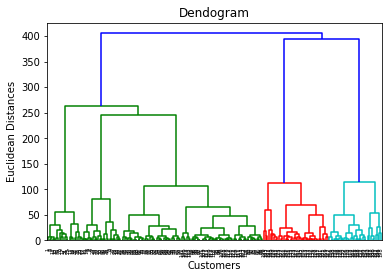

In [13]:
"""
dendrogram the hierarchical clustering (linkage) algorithm
- method = ward would minimize the Within Cluster Sum of Variance (WCSV)
    like how in K-Means we minimize the WCSS in the Elbow method graph
"""
dendogram = sch.dendrogram(sch.linkage(x, method="ward"))
plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# Agglomerative Clustering Model
Now that we know the optimal number of clusters is 5, let's create the model!

In [14]:
# import the agglomerative clustering (a type of hierarchical clustering) class
from sklearn.cluster import AgglomerativeClustering

In [21]:
# create an agglomerative clustering with 5 clusters, euclidean distance, and ward (WCSV) method
hc = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")

In [33]:
"""
fit and predict the clusterings of the data set x.

You cannot predict on another data set using AgglomerativeClustering because when creating
the dendogram, the algorithm can only analyze the data set it originally fitted into
"""
y_hc = hc.fit_predict(x)

# notice how it classified each data point to a cluster using 5 clusters total
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

# Visualize The Clusters
We can visualize each cluster on a graph of Annual Income (x) vs Spending Score (y).

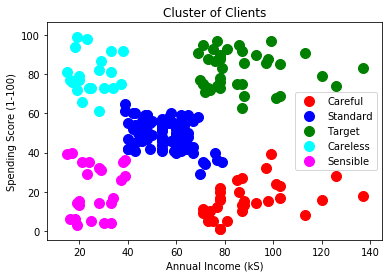

In [34]:
# visualize the first cluster (careful customers) with color of the dots = red and size = 100
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], c="red", s=100, label="Careful")

# visualize the second cluster (standard customers) with color of the dots = blue and size = 100
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], c="blue", s=100, label="Standard")

# visualize the third cluster (target customers) with color of the dots = green and size = 100
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], c="green", s=100, label="Target")

# visualize the fourth cluster (careless customers) with color of the dots = cyan and size = 100
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], c="cyan", s=100, label="Careless")

# visualize the fifth cluster (sensible customers) with color of the dots = magenta and size = 100
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], c="magenta", s=100, label="Sensible")

# plot the Annual Income vs Spending Score
plt.title("Cluster of Clients")
plt.xlabel("Annual Income (kS)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()